In [5]:
from google.colab import files
uploaded = files.upload()

Saving ss.jpg to ss.jpg


In [6]:
import os
os.listdir()

['.config', 'Screenshot (11).png', 'ss.jpg', 'sample_data']

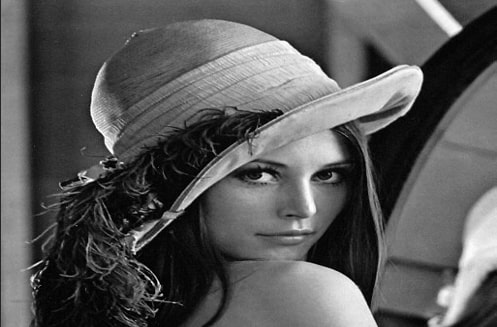

In [7]:
from IPython.display import Image
display(Image(filename='ss.jpg'))

In [8]:
import cv2
import matplotlib.pyplot as plt

# Ensure OpenCV is installed
!pip install opencv-python-headless


In [9]:
import cv2

# Load the uploaded image
image_filename = list(uploaded.keys())[0]  # Get the uploaded image filename
image = cv2.imread(image_filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format

In [10]:
# Define new dimensions
new_width = 100
new_height = 100

# Linear Interpolation
resized_linear = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

# Nearest Neighbors Interpolation
resized_nearest = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_NEAREST)

# Polynomial Interpolation (using INTER_CUBIC as an example)
resized_cubic = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)

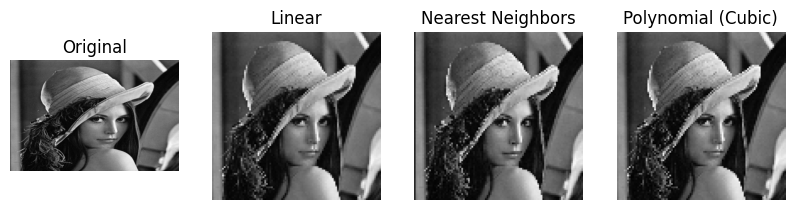

In [11]:
# Display original and resized images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 4, 1)
plt.title('Original')
plt.imshow(image)
plt.axis('off')

# Linear Interpolation
plt.subplot(1, 4, 2)
plt.title('Linear')
plt.imshow(resized_linear)
plt.axis('off')

# Nearest Neighbors Interpolation
plt.subplot(1, 4, 3)
plt.title('Nearest Neighbors')
plt.imshow(resized_nearest)
plt.axis('off')

# Polynomial (Cubic) Interpolation
plt.subplot(1, 4, 4)
plt.title('Polynomial (Cubic)')
plt.imshow(resized_cubic)
plt.axis('off')

plt.show()

In [12]:
# Apply Box Blur
box_blur = cv2.blur(image, (5, 5))

In [13]:
# Apply Gaussian Blur
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

In [14]:
# Apply Median Blur
median_blur = cv2.medianBlur(image, 5)

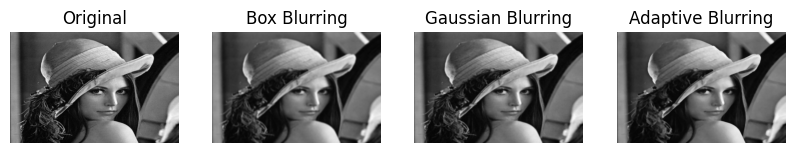

In [15]:
# Display original and blurred images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 4, 1)
plt.title('Original')
plt.imshow(image)
plt.axis('off')

# Box Blurring
plt.subplot(1, 4, 2)
plt.title('Box Blurring')
plt.imshow(box_blur)
plt.axis('off')

# Gaussian Blurring
plt.subplot(1, 4, 3)
plt.title('Gaussian Blurring')
plt.imshow(gaussian_blur)
plt.axis('off')

# Adaptive (Median) Blurring
plt.subplot(1, 4, 4)
plt.title('Adaptive Blurring')
plt.imshow(median_blur)
plt.axis('off')

plt.show()

In [16]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Split the data into features (X) and labels (y)
X, y = mnist.data, mnist.target

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:110: UserWarning: A network error occurred while downloading https://api.openml.org/api/v1/json/data/list/data_name/mnist_784/limit/2/data_version/1. Retrying...
  warn(


URLError: <urlopen error [Errno 110] Connection timed out>

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on test data
y_pred_nb = nb_model.predict(X_test)

# Calculate metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
# ROC and AUC are not applicable for multi-class problems directly with Naive Bayes

print("Naive Bayes Metrics")
print(f"Accuracy: {accuracy_nb}")
print(f"Precision: {precision_nb}")
print(f"Recall: {recall_nb}")
print(f"F1-Score: {f1_nb}")
print(f"Confusion Matrix:\n{conf_matrix_nb}")

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
import numpy as np

# Train SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test)
y_pred_svm_proba = svm_model.predict_proba(X_test)

# Calculate metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Binarize labels for ROC and AUC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Calculate AUC
auc_svm = roc_auc_score(y_test_binarized, y_pred_svm_proba, multi_class='ovr')

print("\nSVM Metrics")
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1-Score: {f1_svm}")
print(f"Confusion Matrix:\n{conf_matrix_svm}")
print(f"AUC: {auc_svm}")

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot ROC curve for the first class as an example
fpr, tpr, _ = roc_curve(y_test_binarized[:, 0], y_pred_svm_proba[:, 0])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc="lower right")
plt.show()